# Anomaly Analysis

In [1]:
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [2]:
reference_volt_curves= pd.read_pickle("../data/reference/reference_volt_curves.pkl")  
media_volt=reference_volt_curves["media"]
reference_curr_curves= pd.read_pickle("../data/reference/reference_current_curves.pkl")  
media_curr=reference_curr_curves["media"]

In [3]:
df= pd.read_pickle("../data/processed/with_stat_anomalies.pkl")  

In [4]:
ML_curr= pd.read_pickle("../data/processed/ML_current_with_anomalies.pkl")
ML_volt= pd.read_pickle("../data/processed/ML_voltage_with_anomalies.pkl") 

## Analisi anomalie di Voltage

In [ ]:
# creazione df con solo le feature che interessano current
df_volt=df.drop(["index","n_current_outliers","%current_anomalies"],axis=1).join(ML_volt[["iForest_volt","LOF_volt","SVM_volt"]])

### Plot delle curve di uno spotname casuale

In [22]:
val_indice=df_volt.loc[['60185_0_00']]
val_indice.columns

Index(['VoltageCurve', 'CurrentCurve', 'voltage_drop', 'voltage_spike',
       'n_voltage_outliers', '%volt_anomalies', 'iForest_volt', 'LOF_volt',
       'SVM_volt'],
      dtype='object')

#### Plot sulla base di voltage_drop

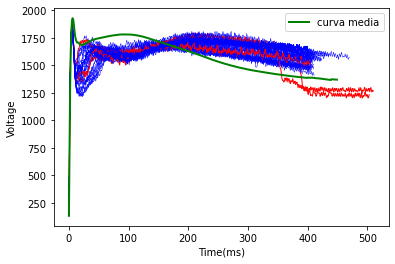

In [23]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.legend();

#### Plot sulla base di voltage_spike

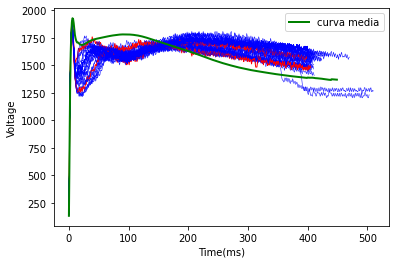

In [24]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["voltage_spike"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.legend();

#### Plot sulla base di %volt_anomalies

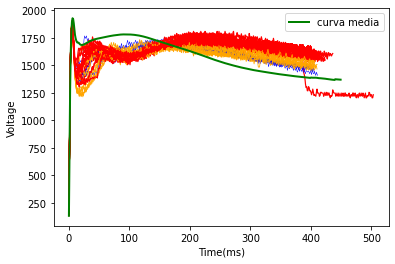

In [64]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["%volt_anomalies"][i]>40:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1.2)
    if 5<val_indice["%volt_anomalies"][i]<40:
        colore="orange"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%volt_anomalies"][i]<5:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.legend();

#### Plot sulla base di iForest

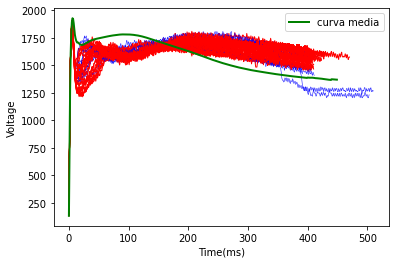

In [70]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["iForest_volt"][i]==1:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1) 
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.legend(); 

### Analisi degli spotName con più voltage outliers

Classifica degli spotname con percentuale di curve anomale più alte.

Con curve anomale si intendono quelle che presentano voltage_drop=True

In [54]:
(df_volt[["voltage_drop"]].groupby("spotName").sum()/df_volt[["voltage_drop"]].groupby("spotName").count()).sort_values(by=["voltage_drop"],ascending=False).head(6)

,voltage_drop
spotName,
60001_0_00,0.988604
60003_0_00,0.987730
60026_0_00,0.967058
60049_0_00,0.873814
60020_0_00,0.757721
60030_0_00,0.724458


#### Plot (100 curve) sulla base di voltage_drop degli spotName più anomali

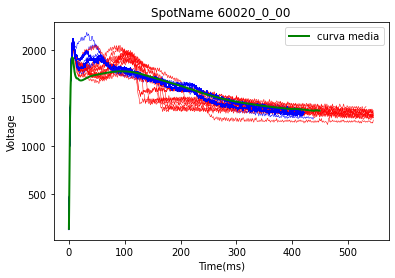

In [70]:
val_indice=df_volt.loc[['60020_0_00']]
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(100):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.title("SpotName 60020_0_00")
plt.legend();

## Analisi anomalie di Current

In [71]:
# creazione df con solo le feature che interessano current
df_curr=df.drop(["index","VoltageCurve","voltage_drop","voltage_spike","n_voltage_outliers","%volt_anomalies"],axis=1).join(ML_curr[["iForest_curr","LOF_curr","SVM_curr"]])
df_curr.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

### Plot delle curve di uno spotname casuale

In [72]:
val_indice=df_curr.loc[['60185_0_00']]
val_indice.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

#### Plot sulla base di %current_anomalies

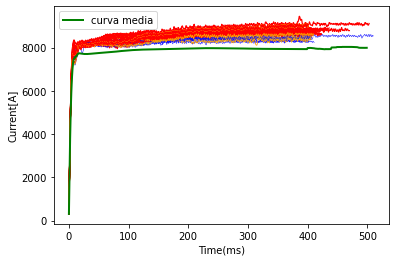

In [73]:
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["%current_anomalies"][i]>50:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1.2)
    if 20<val_indice["%current_anomalies"][i]<50:
        colore="orange"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%current_anomalies"][i]<20:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
plt.plot(media_curr[:500],linewidth=2,c="green",label="curva media")
plt.legend(); 

#### Plot sulla base di iForest

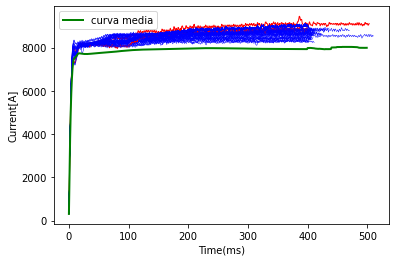

In [76]:
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1)  
plt.plot(media_curr[:500],linewidth=2,c="green",label="curva media")
plt.legend(); 

### Analisi degli spotName con più current outliers

In [72]:
df_curr.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

Classifica degli spotname con percentuale di curve current anomale più alte.

Con curve anomale si intendono quelle che presentano iForest_curr=-1

In [82]:
(df_curr[["iForest_curr"]][df_curr["iForest_curr"]==-1].groupby("spotName").count()/df_curr[["iForest_curr"]].groupby("spotName").count()).sort_values(by=["iForest_curr"],ascending=False).head(6)

,iForest_curr
spotName,
60049_0_00,0.938144
60184_0_00,0.905117
60169_0_00,0.807177
60166_0_00,0.756834
60028_0_00,0.658460
60055_0_00,0.548707


#### Plot (100 curve) sulla base di voltage_drop degli spotName più anomali

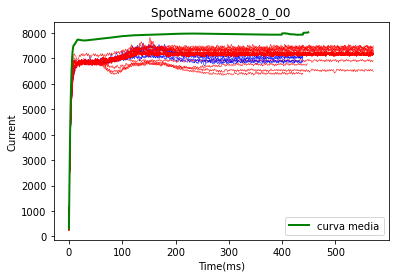

In [95]:
val_indice=df_curr.loc[['60028_0_00']]
plt.xlabel("Time(ms)")
plt.ylabel("Current")
for i in range(100):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)  
plt.plot(media_curr[:450],linewidth=2,c="green",label="curva media")
plt.title("SpotName 60028_0_00")
plt.legend();